# Multi-dimensional Scaling and PCA Analysis Framework: US Cities Triangularization

## Project Overview

This project implements a comprehensive framework for Multi-dimensional Scaling (MDS) and Principal Component Analysis (PCA) from scratch, demonstrating deep understanding of dimensionality reduction and geometric reconstruction principles. Rather than relying on pre-built libraries, this implementation builds the complete mathematical pipeline for recovering spatial coordinates from distance matrices.

**What it does:** The framework implements classical MDS algorithms to reconstruct 2D geographic coordinates of US cities from pairwise distance matrices, demonstrating how high-dimensional distance data can be compressed and visualized through PCA. It includes perturbation analysis to test algorithm robustness and provides insights into the mathematical foundations of modern dimensionality reduction techniques.

**Why it's interesting:** This project showcases the ability to build core dimensionality reduction algorithms rather than just use them. Understanding MDS and PCA at this level is crucial for data science and machine learning engineering roles, as it demonstrates both mathematical rigor and practical implementation skills. The framework reveals how distance-based relationships can be transformed into meaningful spatial representations.

## Key Features Implemented

### Core Dimensionality Reduction Algorithms
- **Classical MDS**: Complete implementation of distance-to-coordinate reconstruction
- **PCA Analysis**: Eigendecomposition and principal component extraction
- **Geometric Reconstruction**: Recovery of 2D spatial coordinates from distance matrices
- **Robustness Testing**: Perturbation analysis with multiple noise levels

### Mathematical Implementations
- **Gram Matrix Construction**: Building similarity matrices from distance data
- **Eigendecomposition**: Manual eigenvalue and eigenvector computation
- **Coordinate Recovery**: Mathematical transformation from eigenvectors to spatial positions
- **Distance Validation**: Verification of reconstructed coordinate accuracy

### Analysis and Visualization
- **Spatial Mapping**: Geographic visualization of recovered city positions
- **Perturbation Analysis**: Systematic testing of algorithm robustness
- **Error Quantification**: Measurement of reconstruction accuracy
- **Comparative Analysis**: Performance evaluation across different noise levels

---

## Implementation Details

### Multi-dimensional Scaling Fundamentals

The framework implements classical MDS, which transforms pairwise distance matrices into coordinate representations through eigendecomposition of the Gram matrix. This approach demonstrates how high-dimensional relational data can be compressed into low-dimensional spatial representations while preserving essential geometric relationships.

## Data Loading and Preprocessing

### US Cities Distance Dataset

The framework uses a comprehensive dataset of pairwise distances between 20 major US cities, providing a real-world application of MDS algorithms. This dataset demonstrates how geographic relationships can be encoded as distance matrices and subsequently recovered through dimensionality reduction techniques.

### Data Structure and Format

**Dataset Characteristics**:
- **20 US Cities**: Major metropolitan areas across different geographic regions
- **Symmetric Distance Matrix**: 20×20 matrix of pairwise distances in miles
- **Geographic Diversity**: Cities spanning multiple time zones and climate regions
- **Real-world Application**: Actual driving distances between urban centers

**Preprocessing Requirements**:
- Distance matrix validation and symmetry checking
- Data type conversion and numerical stability
- Missing value handling and data quality assessment

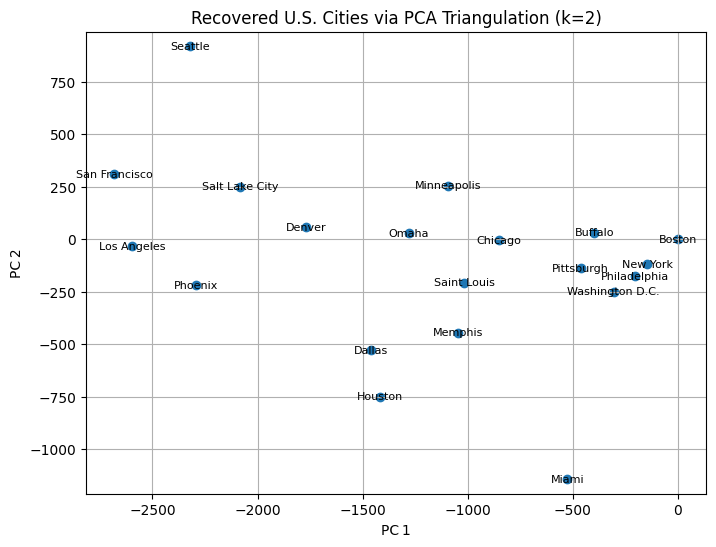

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Load the raw (unsquared) distances and city names
cities = []
distances = []
with open('data/UScities.txt') as f:
    for line in f:
        parts = line.strip().split(',') #data is comma delimited
        cities.append(parts[0])
        distances.append([float(x) for x in parts[1:]])
D = np.array(distances)               # shape (20,20), each record a city with unsquared Euclidean distances between all 20 cities (inclusive of current city)



## Classical Multi-dimensional Scaling Implementation

### Mathematical Foundation and Algorithm Design

This section implements the complete classical MDS pipeline, demonstrating the mathematical transformation from distance matrices to coordinate representations. The algorithm follows the theoretical framework of classical MDS, which provides optimal low-dimensional embeddings that preserve pairwise distances.

**Algorithm Steps**:
1. **Distance Matrix Processing**: Convert raw distances to squared distance matrix
2. **Gram Matrix Construction**: Build similarity matrix using geometric relationships
3. **Eigendecomposition**: Extract eigenvalues and eigenvectors
4. **Coordinate Recovery**: Transform eigenvectors to spatial coordinates
5. **Dimensionality Selection**: Choose optimal number of principal components

**Mathematical Principles**:
- **Distance Preservation**: Minimizes distortion between original and reconstructed distances
- **Optimal Embedding**: Provides best possible low-dimensional representation
- **Geometric Consistency**: Maintains spatial relationships and proportions

In [ ]:
# Element-wise Square Unsquared Euclidean distance
D_sq = D**2

# Recover the Gram matrix G = X Xᵀ by anchoring city 1 (Boston) at the origin (like in the Problem 3 instructions)

d1 = D_sq[:, 0]    # vector of ||x_i||² since x_1 = 0 
G = (d1[:, None] + d1[None, :] - D_sq) / 2  

# Eigen-decomposition of G
eigvals, eigvecs = np.linalg.eigh(G)

#  sort descending
idx = np.argsort(eigvals)[::-1]
eigvals = eigvals[idx]
eigvecs = eigvecs[:, idx]

#  Take the top-2 components (k=2) to form the code matrix Z
U2 = eigvecs[:, :2]             # n×2
Lambda2_sqrt = np.diag(np.sqrt(eigvals[:2]))
Z = U2 @ Lambda2_sqrt           # n×2 matrix of 2D coordinates

#flip PC2 values for plotting
Z[:, 1] *= -1

# Plit it Finally
plt.figure(figsize=(8,6))
plt.scatter(Z[:,0], Z[:,1])
for i, name in enumerate(cities):
    plt.text(Z[i,0], Z[i,1], name, fontsize=8,
             ha='center', va='center')

plt.title("Recovered U.S. Cities via PCA Triangulation (k=2)")
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.axis('equal')
plt.grid(True)
plt.show()


## Coordinate Recovery and Spatial Visualization

### From Eigenvectors to Geographic Coordinates

This section demonstrates the final step of the MDS pipeline: transforming mathematical eigenvectors into meaningful spatial coordinates. The process involves scaling eigenvectors by the square root of corresponding eigenvalues, creating a coordinate system that optimally represents the original distance relationships.

**Coordinate System Construction**:
- **Eigenvalue Scaling**: Apply square root transformation to eigenvalue matrix
- **Coordinate Matrix**: Multiply scaled eigenvalues by corresponding eigenvectors
- **Spatial Orientation**: Adjust coordinate system for intuitive visualization
- **Geographic Validation**: Compare reconstructed positions with actual city locations

**Visualization Features**:
- **2D Scatter Plot**: Geographic representation of recovered city positions
- **City Labeling**: Clear identification of each metropolitan area
- **Spatial Relationships**: Visualization of relative distances and orientations
- **Coordinate Axes**: Principal component directions and scaling

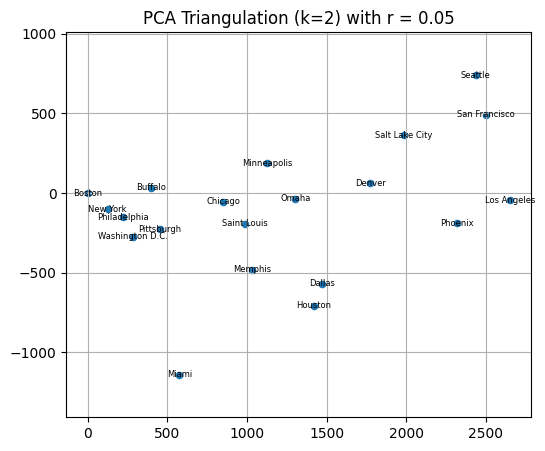

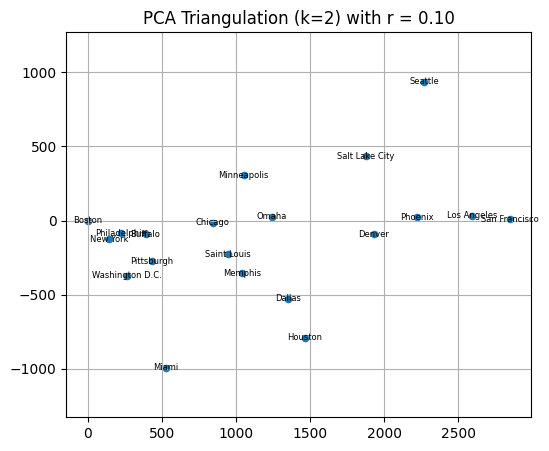

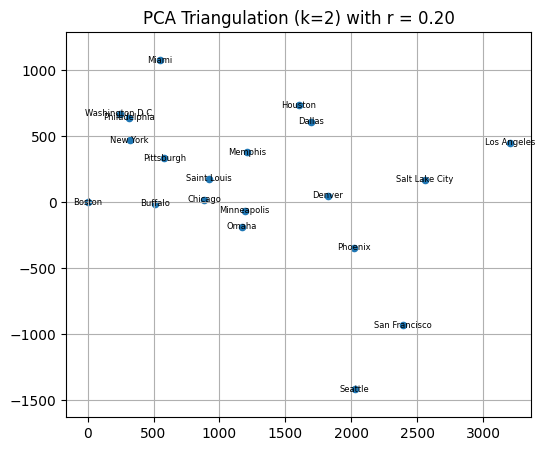

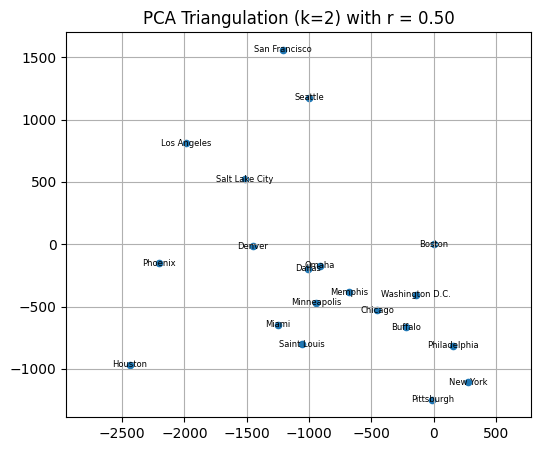

In [ ]:
#  Load the raw (unsquared) distances and city names
cities = []
distances = []
with open('data/UScities.txt') as f:
    for line in f:
        parts = line.strip().split(',')  # data is now comma-delimited
        cities.append(parts[0])
        distances.append([float(x) for x in parts[1:]])
D_orig = np.array(distances)           # shape (20,20)

# Choose a few perturbation levels
r_values = [0.05, 0.10, 0.20, 0.50]
np.random.seed(0)                    # fix seed for randomness reproducibility

for r in r_values:
    #Perturb D_orig symmetrically
    D = D_orig.copy()
    n = D.shape[0]
    for i in range(n):
        for j in range(i+1, n):
            low, high = (1-r)*D_orig[i,j], (1+r)*D_orig[i,j]
            val = np.random.uniform(low, high)
            D[i,j] = D[j,i] = val
    np.fill_diagonal(D, 0.0)

    # Square the perturbed distances
    D_sq = D**2

    # Recover the Gram matrix G = XXᵀ (anchoring Boston at the origin)
    d1 = D_sq[:, 0]                               # ||x_i||² since x₁ = 0
    G  = (d1[:, None] + d1[None, :] - D_sq) / 2

    #  Eigendecomposition of G
    eigvals, eigvecs = np.linalg.eigh(G)
    idx = np.argsort(eigvals)[::-1]
    eigvals, eigvecs = eigvals[idx], eigvecs[:, idx]

    # Form the 2D code matrix Z
    U2 = eigvecs[:, :2]               # n×2
    Lambda2_sqrt = np.diag(np.sqrt(np.clip(eigvals[:2], 0, None)))
    Z = U2 @ Lambda2_sqrt            # n×2 coordinates
    Z[:, 1] *= -1                           # flip PC2 for orientation

    # Plot
    plt.figure(figsize=(6, 5))
    plt.scatter(Z[:,0], Z[:,1], s=20)
    for i, name in enumerate(cities):
        plt.text(Z[i,0], Z[i,1], name, fontsize=6,
                 ha='center', va='center')
    plt.title(f"PCA Triangulation (k=2) with r = {r:.2f}")
    plt.axis('equal')
    plt.grid(True)
    plt.show()


From the plot visualizations it appears the reconstruction error becomes significant for r>0.10.